Initial exploration of 311 data

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
# import matplotlib as mpl
import seaborn as sns

/Users/mmolli/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [16]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Download data

https://data.sfgov.org/City-Infrastructure/Case-Data-from-San-Francisco-311-SF311-/vw6y-z8j6 (export csv)

## And rename with timestamp

```bash
$ mv Case_Data_from_San_Francisco_311__SF311.csv Case_Data_from_San_Francisco_311__SF311_2016-02-10.csv
```

In [4]:
df = pd.read_csv('~/data/311/Case_Data_from_San_Francisco_311__SF311_2016-02-10.csv', header=0, index_col=0, parse_dates=[1, 2, 3])

/Users/mmolli/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.shape

(1553412, 15)

In [6]:
df.head()

,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
CaseID,,,,,,,,,,,,,,,
5553381,2016-02-10 00:47:01,NaT,2016-02-10 00:47:01,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Garbage_and_Debris,Encampment,"501 FOLSOM ST, SAN FRANCISCO, CA, 94105",6,Rincon Hill,"(37.787045479266, -122.394542008852)",Open311,NaN
5553380,2016-02-10 00:42:09,NaT,2016-02-10 00:42:10,Open,accepted,Recology_Abandoned,Street and Sidewalk Cleaning,Garbage_and_Debris,Furniture,Intersection of 6TH ST and BRANNAN ST,6,South of Market,"(37.7748086966786, -122.400981715418)",Open311,NaN
5553378,2016-02-10 00:28:38,NaT,2016-02-10 00:28:41,Open,Open,DPT Abandoned Vehicles Work Queue,Abandoned Vehicle,NaN,NaN,"25 14TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.768506705888, -122.414159702508)",Open311,http://mobile311.sfgov.org/media/san_francisco...
5553377,2016-02-10 00:27:04,NaT,2016-02-10 00:27:06,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Garbage_and_Debris,Other_loose_garbage_debris_yard_waste,Intersection of 14TH ST and TRAINOR ST,9,Mission,"(37.7686021036354, -122.414540135493)",Open311,http://mobile311.sfgov.org/media/san_francisco...
5553376,2016-02-10 00:26:41,NaT,2016-02-10 00:26:41,Open,Open,County Clerk - G,General Requests,county_clerk - county_clerk - followup_request,county_clerk - county_clerk - followup_request,Not associated with a specific address,0,NaN,NaN,Web Self Service,NaN


In [7]:
df['Category'].value_counts()

Street and Sidewalk Cleaning    543001
Graffiti Public Property        150129
Graffiti Private Property       116657
Abandoned Vehicle               115430
General Requests                 95772
Damaged Property                 66222
SFHA Requests                    62212
Sewer Issues                     53188
Streetlights                     43934
Tree Maintenance                 40555
Street Defects                   34080
Litter Receptacles               33610
Illegal Postings                 31469
Sign Repair                      28864
Rec and Park Requests            27016
Sidewalk or Curb                 24638
MUNI Feedback                    22731
Temporary Sign Request           17120
311 External Request             16643
Blocked Street or SideWalk       12362
Residential Building Request      6958
Catch Basin Maintenance           4666
Color Curb                        3312
Interdepartmental Request         1052
Noise Report                       998
Unpermitted Cab Complaint

In [8]:
df['Opened_ymd'] = df['Opened'].map(lambda x: x.strftime('%Y-%m-%d'))

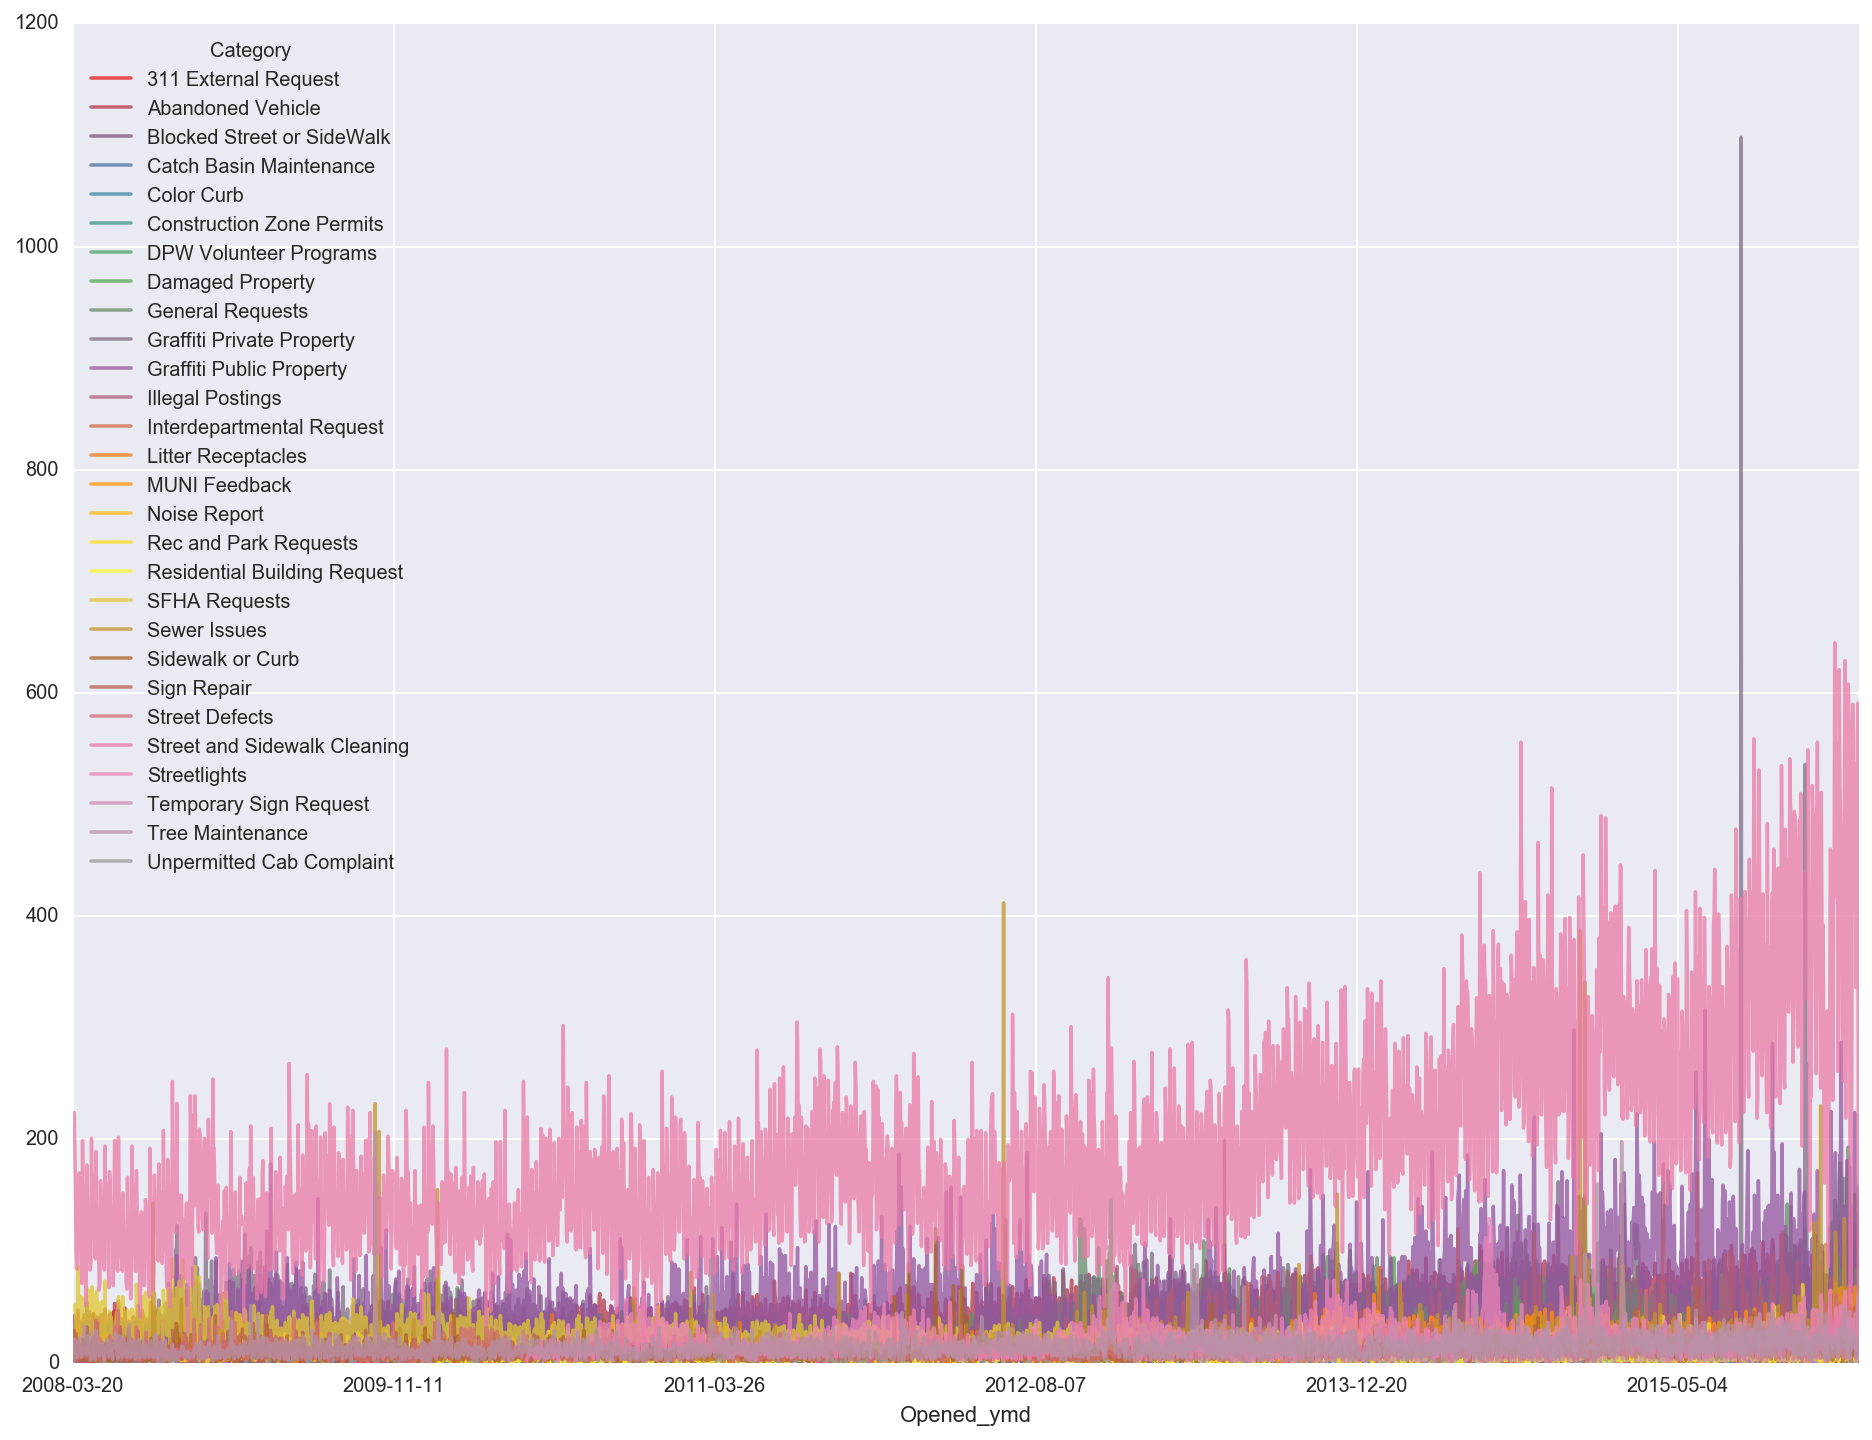

In [9]:
fix, ax = plt.subplots(figsize=(16, 12))
colormap='Set1'
df.groupby(by=['Opened_ymd', 'Category'])['Opened'].count().unstack().plot(ax=ax, colormap=colormap, alpha=.75)

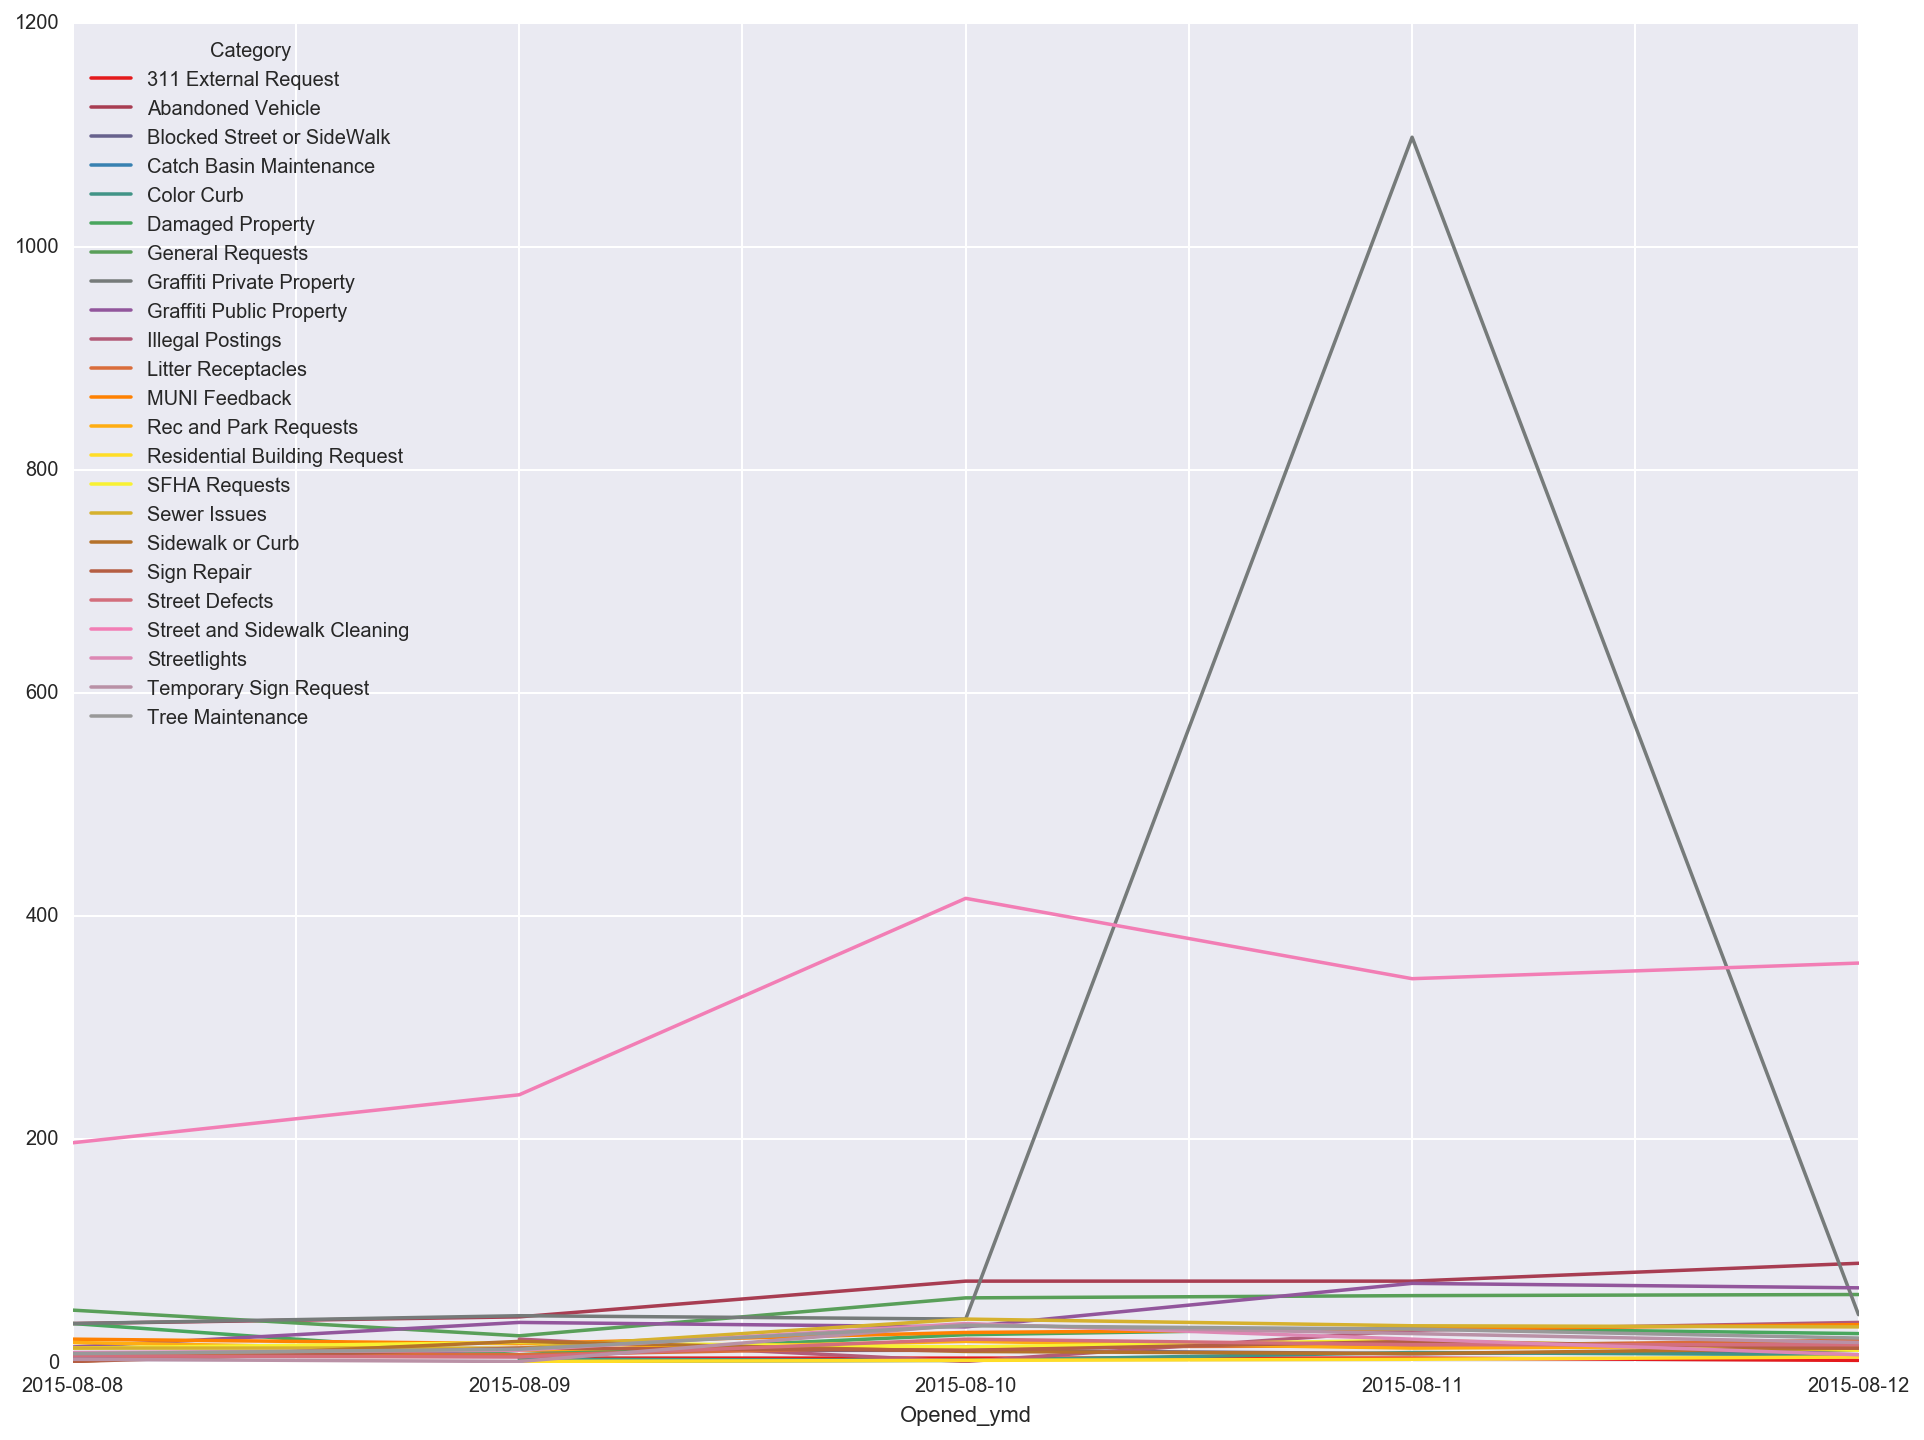

In [10]:
fix, ax = plt.subplots(figsize=(16, 12))
colormap='Set1'
df[(df['Opened'] > '2015-08-08') & (df['Opened'] < '2015-08-13')].groupby(by=['Opened_ymd', 'Category'])['Opened'].count().unstack().plot(ax=ax, colormap=colormap)

In [11]:
df[(df['Category'] == 'Street and Sidewalk Cleaning')]['Neighborhood'].value_counts().head(10)

Mission                  74342
South of Market          48677
Downtown/Civic Center    28013
Bayview                  23193
Tenderloin               20211
Western Addition         19882
Excelsior                16605
Bernal Heights           14796
Nob Hill                 14766
Outer Sunset             13808
Name: Neighborhood, dtype: int64

In [12]:
df[(df['Category'] == 'Noise Report')]['Neighborhood'].value_counts().head(10)

South of Market    93
Mission            91
Outer Sunset       56
Civic Center       48
Lower Nob Hill     40
Noe Valley         28
Mission Dolores    27
Inner Richmond     21
Pacific Heights    21
Marina             19
Name: Neighborhood, dtype: int64

In [13]:
df[(df['Opened_ymd'] == '2015-08-11')]['Category'].value_counts().head(10)

Graffiti Private Property       1098
Street and Sidewalk Cleaning     344
Abandoned Vehicle                 73
Graffiti Public Property          71
General Requests                  60
Sewer Issues                      33
Damaged Property                  31
MUNI Feedback                     30
Tree Maintenance                  30
Illegal Postings                  29
Name: Category, dtype: int64

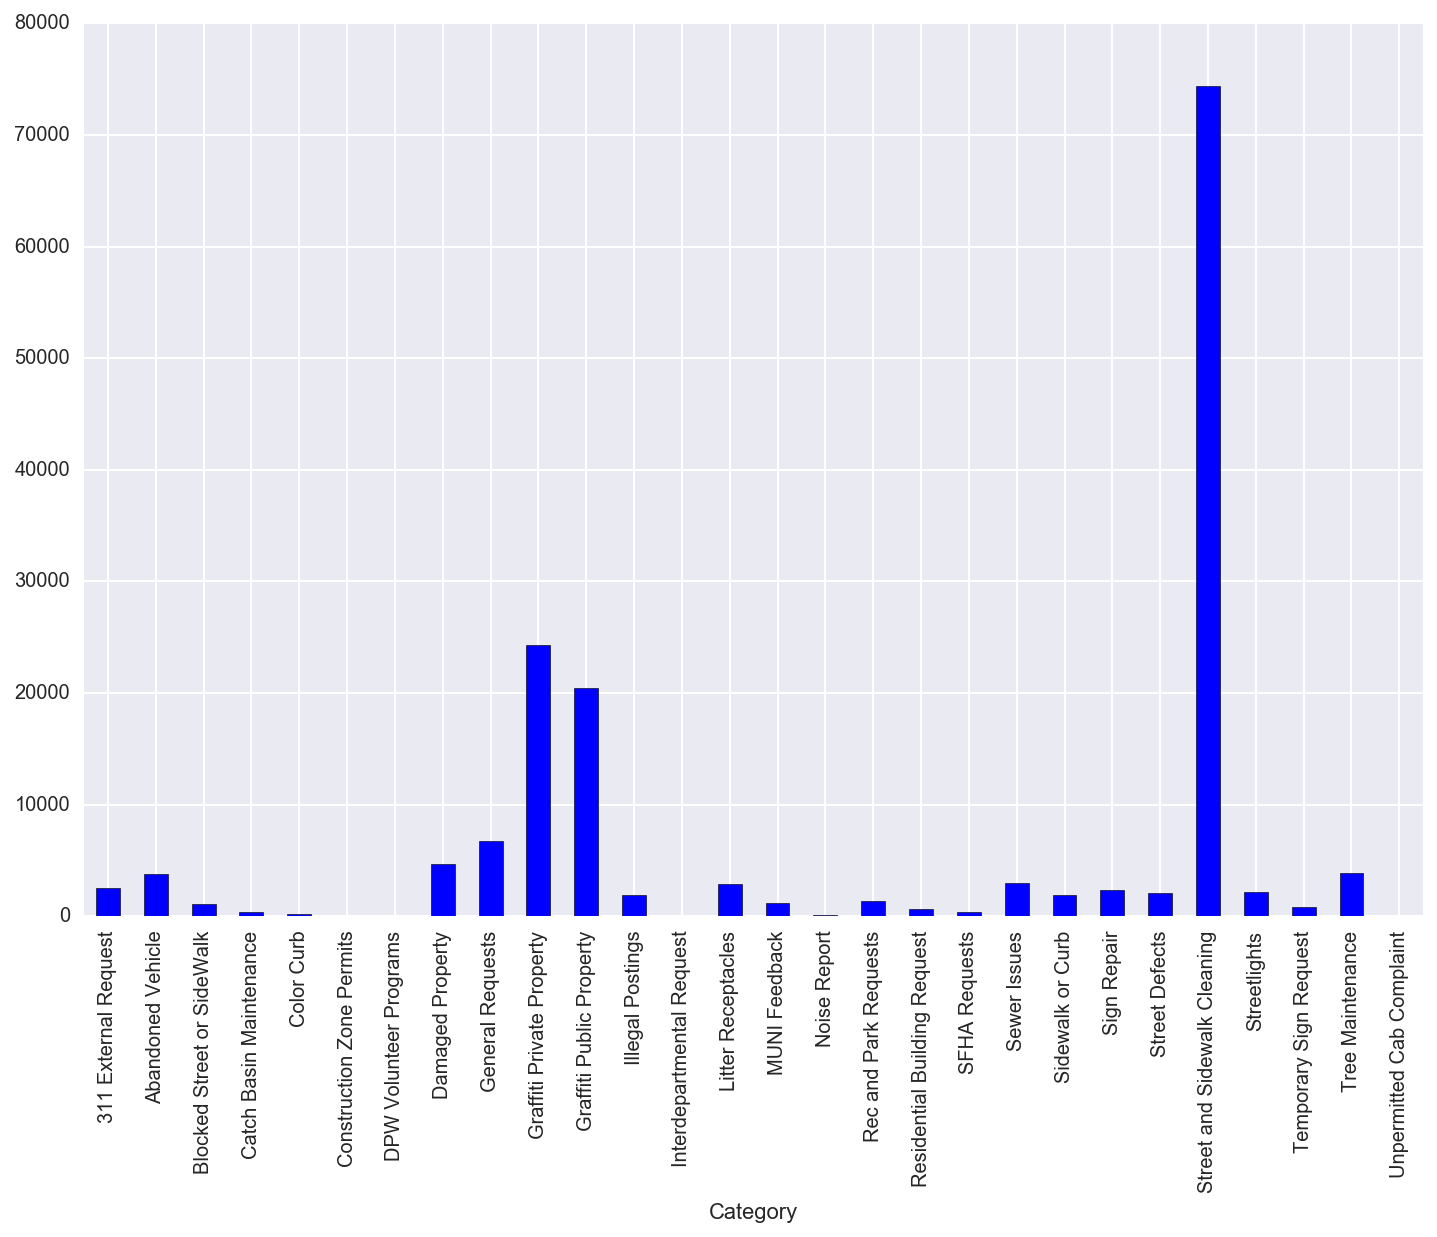

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
df.groupby(by=['Category', 'Neighborhood'])['Opened'].count().unstack()['Mission'].T.plot(ax=ax, kind='bar')

In [148]:
category = [
    '311 External Request',
    'Abandoned Vehicle',
    'Blocked Street or SideWalk',
    'Catch Basin Maintenance',
    'Color Curb',
#     'Construction Zone Permits',
#     'DPW Volunteer Programs',
    'Damaged Property',
    'General Requests',
    'Graffiti Private Property',
    'Graffiti Public Property',
    'Illegal Postings',
    'Interdepartmental Request',
    'Litter Receptacles',
    'MUNI Feedback',
    'Noise Report',
    'Rec and Park Requests',
    'Residential Building Request',
    'SFHA Requests',
    'Sewer Issues',
    'Sidewalk or Curb',
    'Sign Repair',
    'Street Defects',
    'Street and Sidewalk Cleaning',
    'Streetlights',
    'Temporary Sign Request',
    'Tree Maintenance',
#     'Unpermitted Cab Complaint',
]

In [138]:
neighbs = [
    'Alamo Square',
#     'Anza Vista',
#     'Apparel City',
#     'Aquatic Park / Ft. Mason',
#     'Ashbury Heights',
#     'Balboa Terrace',
    'Bayview',
    'Bernal Heights',
#     'Bret Harte',
#     'Buena Vista',
#     'Candlestick Point SRA',
    'Castro',
#     'Castro/Upper Market',
    'Cathedral Hill',
#     'Cayuga',
#     'Central Waterfront',
    'Chinatown',
    'Civic Center',
#     'Clarendon Heights',
#     'Cole Valley',
#     'Corona Heights',
    'Cow Hollow',
#     'Crocker Amazon',
#     'Diamond Heights',
    'Dogpatch',
    'Dolores Heights',
    'Downtown / Union Square',
#     'Downtown/Civic Center',
    'Duboce Triangle',
#     'Eureka Valley',
#     'Excelsior',
#     'Fairmount',
    'Financial District',
    "Fisherman's Wharf",
#     'Forest Hill',
#     'Forest Knolls',
    'Glen Park',
    'Golden Gate Heights',
    'Golden Gate Park',
    'Haight Ashbury',
    'Hayes Valley',
#     'Holly Park',
#     'Hunters Point',
#     'India Basin',
#     'Ingleside',
#     'Ingleside Terraces',
    'Inner Richmond',
    'Inner Sunset',
    'Japantown',
#     'Laguna Honda',
#     'Lake Street',
#     'Lakeshore',
#     'Laurel Heights / Jordan Park',
#     'Lincoln Park / Ft. Miley',
#     'Little Hollywood',
#     'Lone Mountain',
    'Lower Haight',
    'Lower Nob Hill',
    'Lower Pacific Heights',
    'Marina',
#     'McLaren Park',
#     'Merced Heights',
#     'Merced Manor',
#     'Midtown Terrace',
#     'Mint Hill',
#     'Miraloma Park',
    'Mission',
    'Mission Bay',
    'Mission Dolores',
    'Mission Terrace',
#     'Monterey Heights',
#     'Mt. Davidson Manor',
    'Nob Hill',
    'Noe Valley',
    'North Beach',
#     'Northern Waterfront',
#     'Ocean View',
    'Oceanview',
    'Outer Mission',
    'Outer Richmond',
    'Outer Sunset',
    'Pacific Heights',
    'Panhandle',
#     'Parkmerced',
#     'Parkside',
#     'Parnassus Heights',
#     'Peralta Heights',
    'Polk Gulch',
#     'Portola',
    'Potrero Hill',
    'Presidio Heights',
#     'Presidio National Park',
#     'Presidio Terrace',
#     'Produce Market',
#     'Rincon Hill',
    'Russian Hill',
#     'Seacliff',
#     'Sherwood Forest',
#     'Showplace Square',
#     'Silver Terrace',
#     'South Beach',
    'South of Market',
#     'St. Francis Wood',
#     "St. Mary's Park",
#     'Stonestown',
#     'Sunnydale',
#     'Sunnyside',
    'Sutro Heights',
    'Telegraph Hill',
    'Tenderloin',
#     'Treasure Island',
#     'Treasure Island/YBI',
#     'Twin Peaks',
#     'Union Street',
#     'University Mound',
    'Upper Market',
#     'Visitacion Valley',
#     'West Portal',
#     'West of Twin Peaks',
    'Western Addition',
#     'Westwood Highlands',
#     'Westwood Park',
#     'Yerba Buena Island',
]

# Look at only 2015

In [150]:
df_yr = df[(df['Opened'] >= '2015-01-01') &
           (df['Opened'] < '2016-01-01') &
           df['Neighborhood'].apply(lambda x: x in neighbs) & 
           df['Category'].apply(lambda x: x in category)
          ]

In [151]:
df_yr.groupby(by=['Category', 'Neighborhood'])['Opened'].count().unstack()

Neighborhood,Alamo Square,Bayview,Bernal Heights,Castro,Cathedral Hill,Chinatown,Civic Center,Cow Hollow,Dogpatch,Dolores Heights,Downtown / Union Square,Duboce Triangle,Financial District,Fisherman's Wharf,Glen Park,Golden Gate Heights,Golden Gate Park,Haight Ashbury,Hayes Valley,Inner Richmond,Inner Sunset,Japantown,Lower Haight,Lower Nob Hill,Lower Pacific Heights,Marina,Mission,Mission Bay,Mission Dolores,Mission Terrace,Nob Hill,Noe Valley,North Beach,Oceanview,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Panhandle,Polk Gulch,Potrero Hill,Presidio Heights,Russian Hill,South of Market,Sutro Heights,Telegraph Hill,Tenderloin,Upper Market,Western Addition
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
311 External Request,3,4,23,5,8,9,24,1,6,6,24,4,24,2,5,6,14,6,8,36,15,5,10,46,9,9,82,3,45,22,26,8,9,4,5,39,64,13,6,7,35,2,14,48,4,2,35,7,13
Abandoned Vehicle,15,499,2119,29,25,19,13,38,45,118,2,35,12,6,95,572,88,69,50,512,244,32,45,93,31,105,489,38,45,342,185,557,143,303,122,1044,1844,184,51,40,252,52,556,231,246,71,27,339,59
Blocked Street or SideWalk,10,33,62,65,36,42,110,11,17,27,50,64,70,6,17,22,7,68,87,47,48,28,68,110,65,51,340,26,70,21,43,74,38,19,19,48,77,103,28,36,69,37,57,399,4,16,66,4,62
Catch Basin Maintenance,2,5,8,NaN,2,4,2,1,1,2,1,4,7,1,9,3,1,4,1,11,3,4,NaN,6,3,7,16,NaN,7,5,NaN,5,6,NaN,2,10,11,9,3,1,6,4,7,28,NaN,2,5,1,2
Color Curb,3,10,45,9,3,NaN,3,9,5,31,2,5,3,NaN,5,7,NaN,15,8,35,23,7,15,7,10,29,33,3,24,25,6,46,9,9,3,33,29,54,6,5,27,15,6,34,NaN,7,6,9,11
Damaged Property,34,66,136,80,162,209,559,23,36,32,287,66,368,208,21,20,69,170,58,305,154,100,87,425,135,191,999,170,122,53,101,62,311,11,28,224,265,158,55,232,43,50,68,1361,5,17,662,12,77
General Requests,71,303,396,309,184,172,474,50,122,195,286,252,354,56,85,146,145,178,174,403,223,55,199,350,135,221,1141,113,382,264,271,311,275,133,116,386,657,425,157,181,363,109,275,1336,57,60,464,89,213
Graffiti Private Property,153,124,142,148,152,1127,714,20,45,63,223,372,104,22,38,31,47,684,281,590,147,61,543,731,140,57,3340,15,817,216,234,51,327,51,83,305,378,96,259,164,406,6,102,2208,37,20,1169,26,281
Graffiti Public Property,272,222,371,233,332,233,910,58,173,292,275,1125,412,30,82,76,520,824,653,1003,530,190,1056,705,614,239,6514,39,1622,221,333,104,299,44,36,647,700,425,726,232,771,83,240,1505,101,32,748,175,746


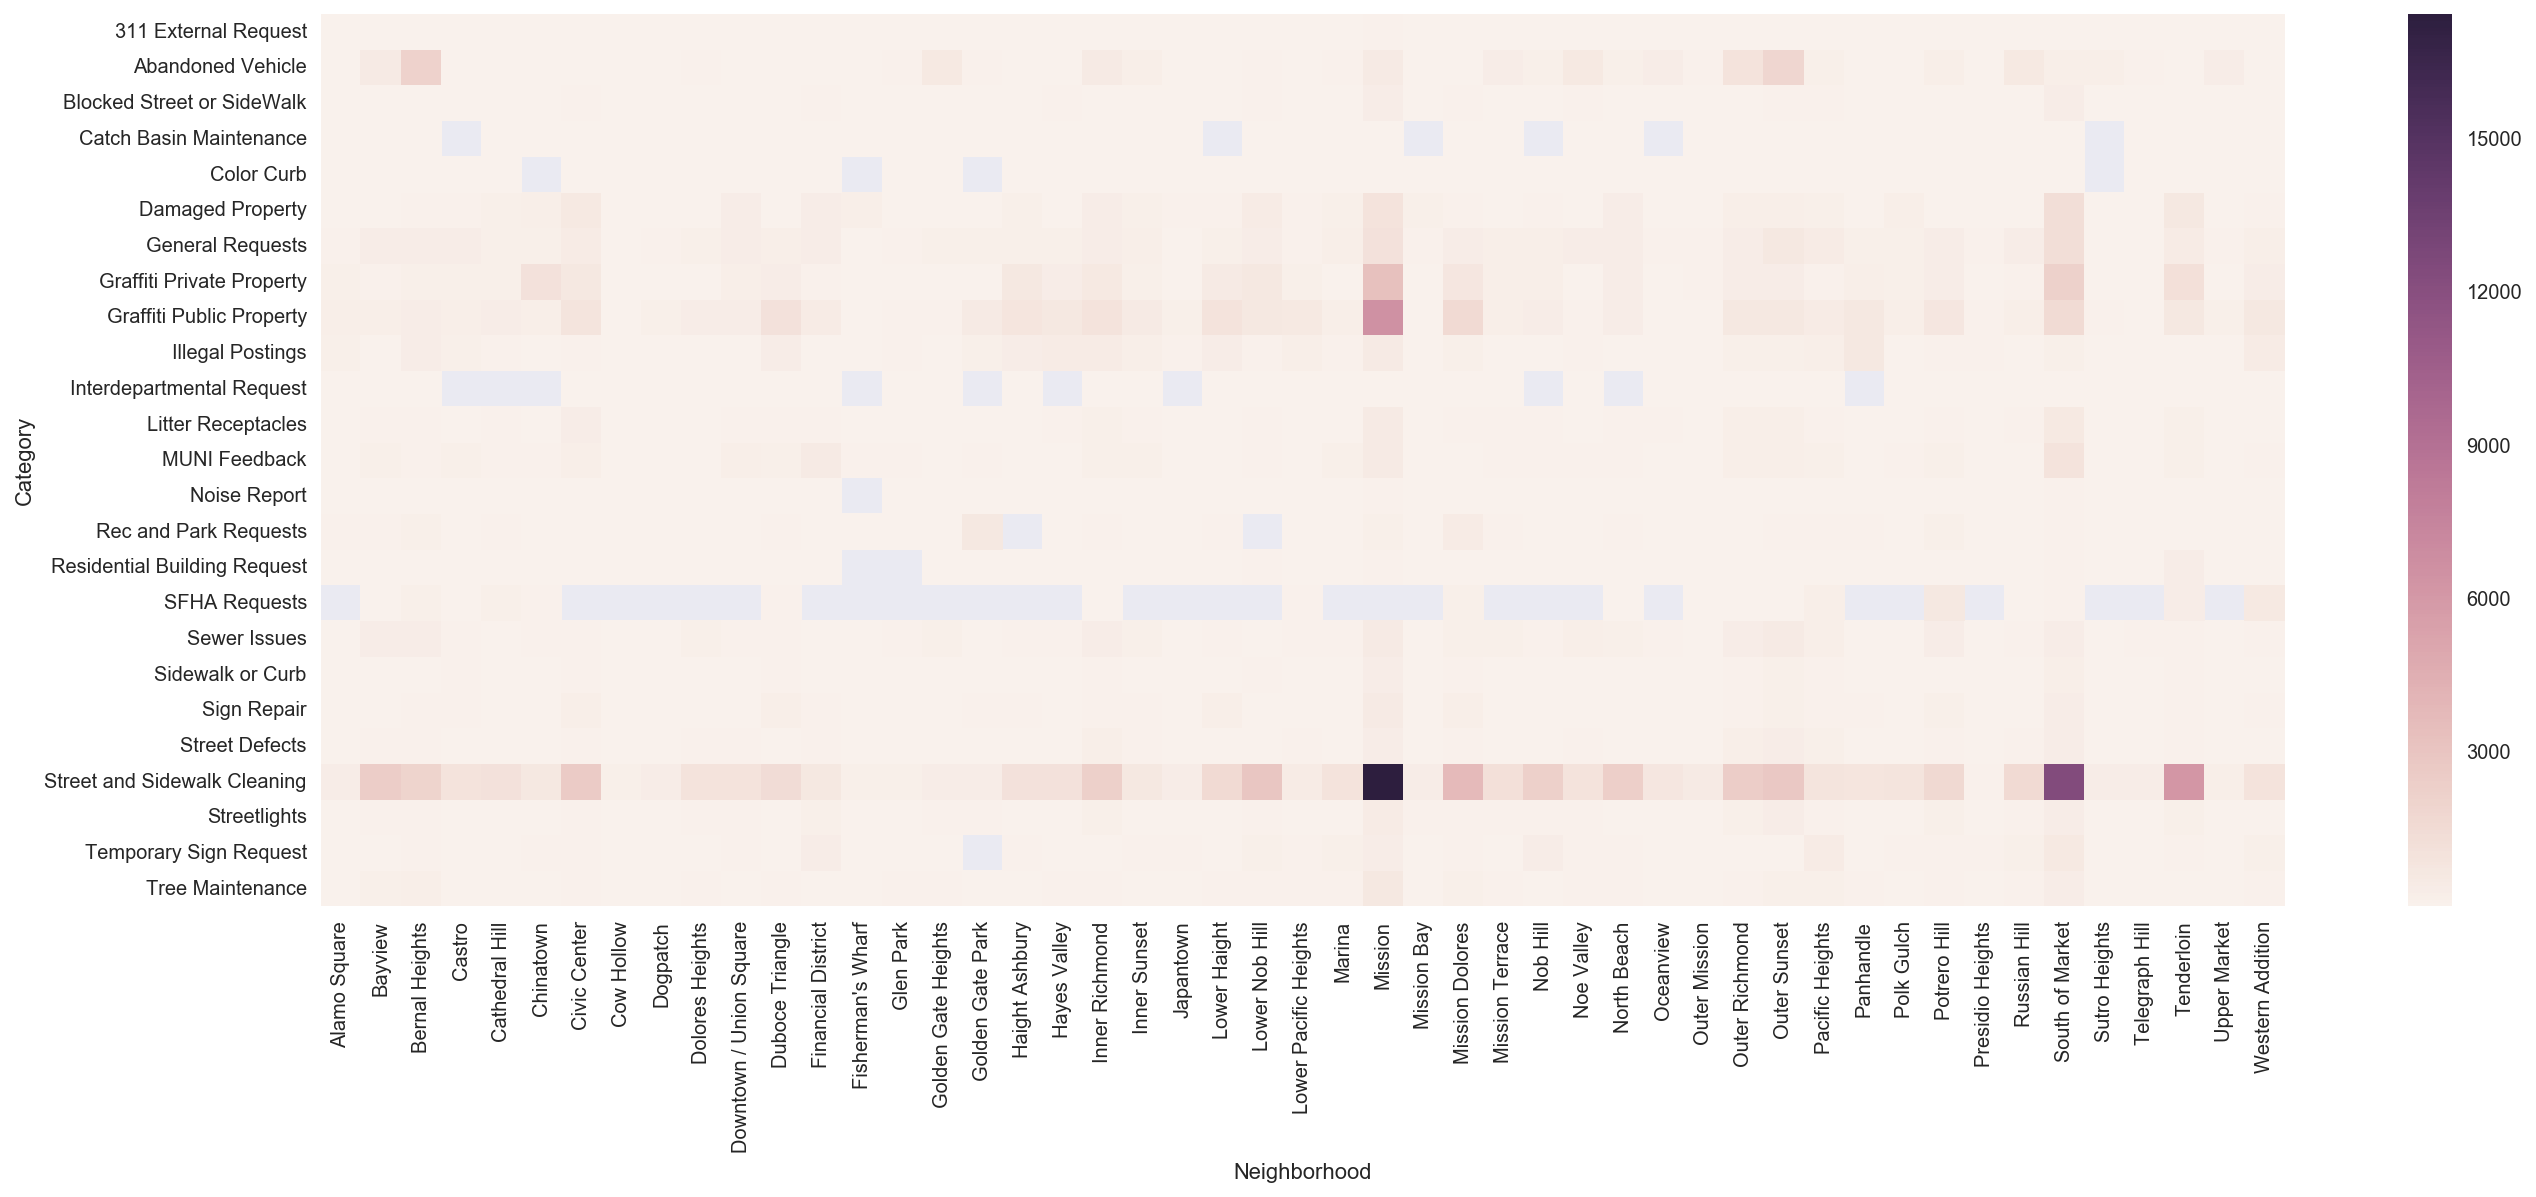

In [152]:
fig, ax = plt.subplots(figsize=(22, 8))

sns.heatmap(df_yr.groupby(by=['Category', 'Neighborhood'])['Opened'].count().unstack(), annot=False, fmt='g')

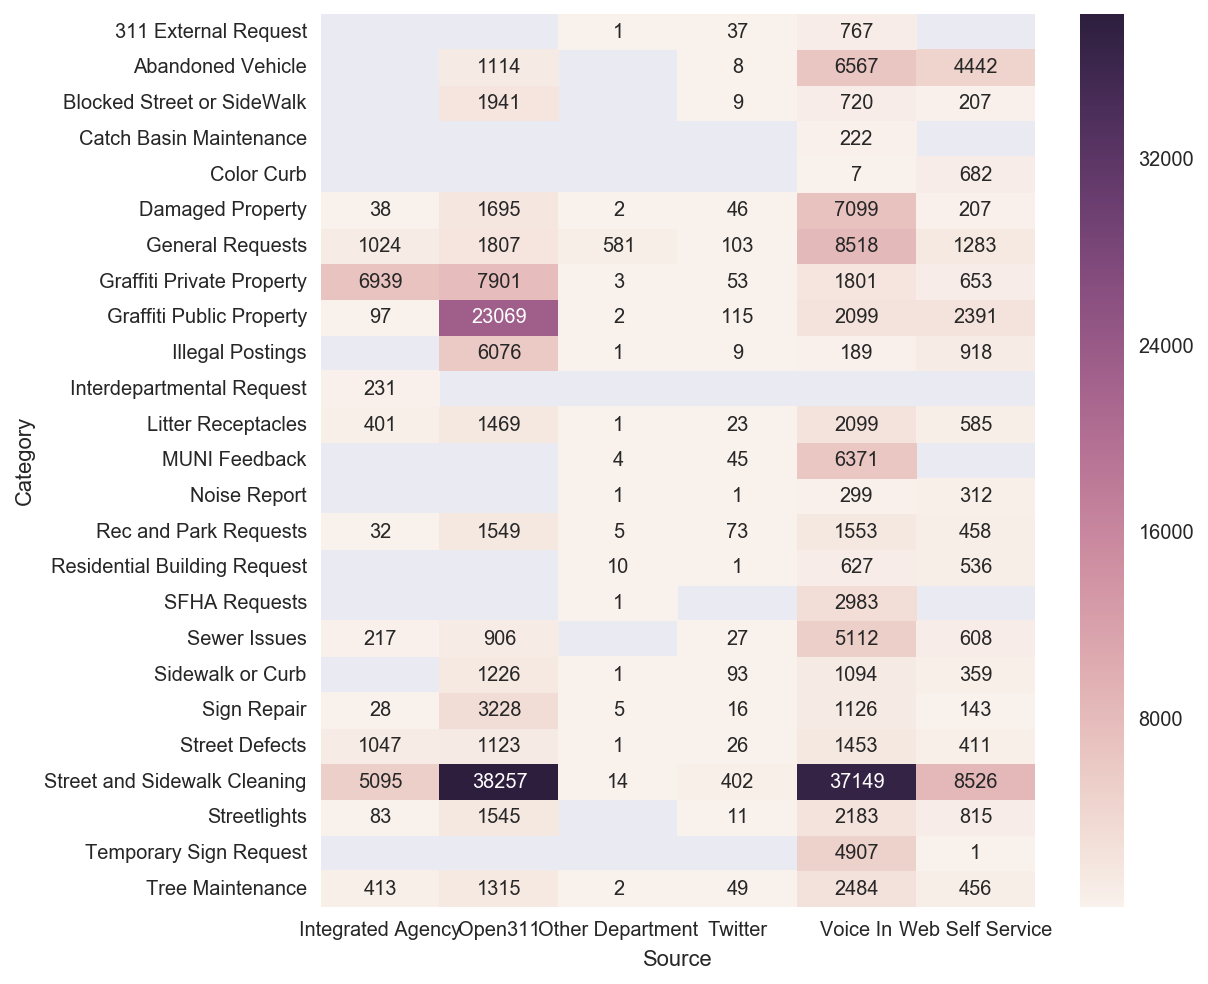

In [153]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_yr.groupby(by=['Category', 'Source'])['Opened'].count().unstack(), annot=True, fmt='g')

In [154]:
from scipy.stats import chi2_contingency

In [155]:
chi2_contingency?

In [156]:
df_cat_src = df_yr.groupby(by=['Category', 'Source'])['Opened'].count().unstack().fillna(0)
chi2, p, dof, expected = chi2_contingency(df_cat_src)

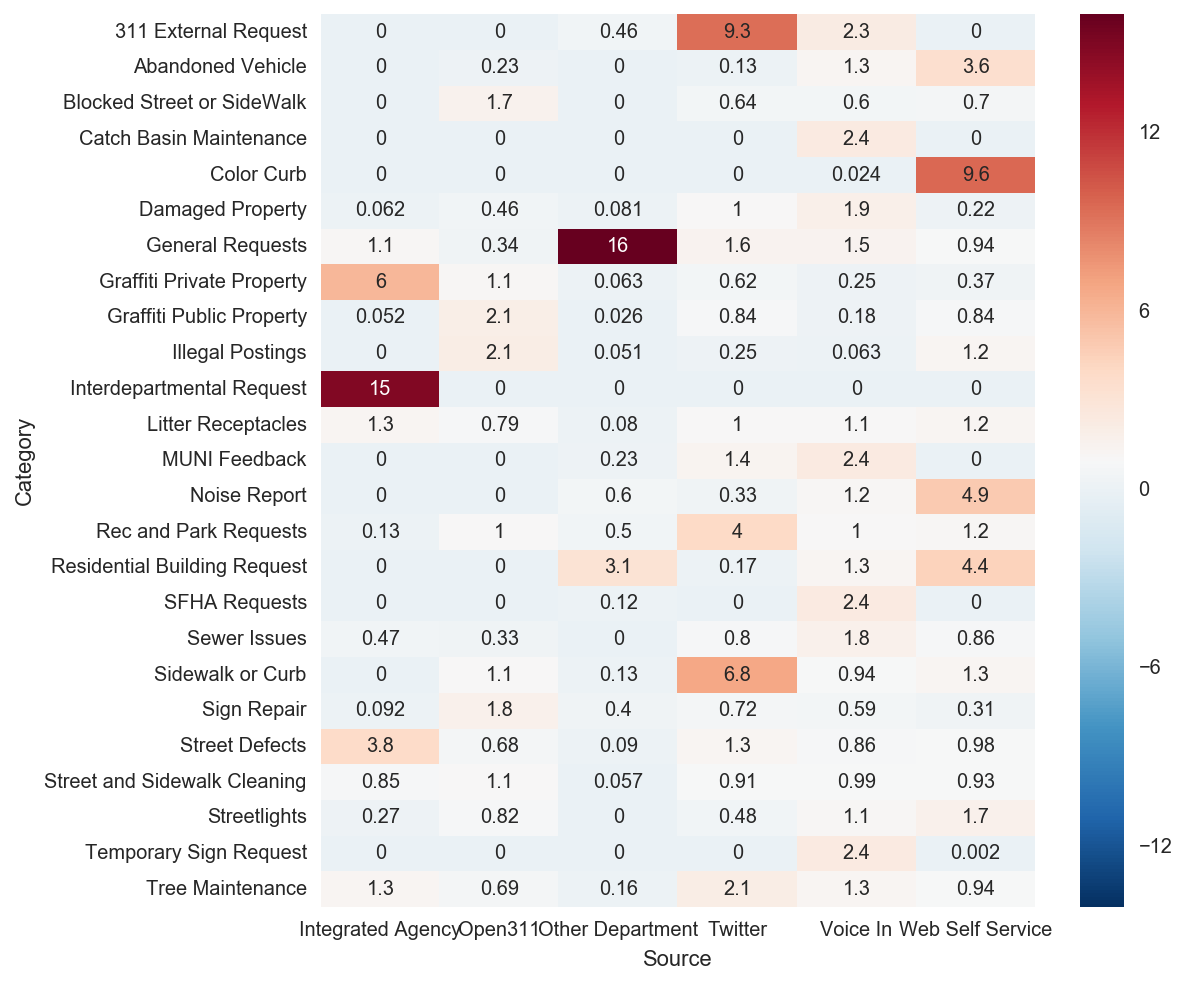

In [157]:
fig, ax = plt.subplots(figsize=(8, 8))

sns.heatmap(df_cat_src / expected, ax=ax, center=1, annot=True, vmin=0)

Resolution time

In [158]:
df_yr.loc[:, 'Resolution_time'] = (df_yr['Closed'] - df_yr['Opened'])

/Users/mmolli/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mmolli/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [160]:
df_yr['Resolution_time'].head()

CaseID
5421726   3 days 15:13:40
5421718   0 days 11:39:10
5421668   0 days 09:33:31
5421666   3 days 08:25:31
5421665               NaT
Name: Resolution_time, dtype: timedelta64[ns]

In [161]:
df_yr['Resolution_days'] = df_yr['Resolution_time'].astype('int') / 1000000000 / 86400
df_yr.loc[df_yr['Resolution_days'] < 0, 'Resolution_days'] = np.nan

/Users/mmolli/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mmolli/anaconda3/lib/python3.5/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [163]:
df_yr['Resolution_days'].head()

CaseID
5421726    3.634491
5421718    0.485532
5421668    0.398275
5421666    3.351053
5421665         NaN
Name: Resolution_days, dtype: float64

In [164]:
(~df_yr[df_yr['Opened'] < '2015-12-14']['Resolution_time'].isnull()).mean()

0.90637643196110274

In [165]:
df_yr.groupby(by=['Category'])['Resolution_days'].mean()

Category
311 External Request             22.201026
Abandoned Vehicle                 4.780398
Blocked Street or SideWalk        5.506960
Catch Basin Maintenance          20.002610
Color Curb                       67.254022
Damaged Property                 46.406418
General Requests                  9.666661
Graffiti Private Property        12.595943
Graffiti Public Property         11.965374
Illegal Postings                 13.103093
Interdepartmental Request        42.838563
Litter Receptacles                3.769425
MUNI Feedback                     6.549232
Noise Report                      4.337130
Rec and Park Requests            19.853531
Residential Building Request     10.664766
SFHA Requests                   166.951033
Sewer Issues                     11.873253
Sidewalk or Curb                 21.355650
Sign Repair                      32.942139
Street Defects                   13.481360
Street and Sidewalk Cleaning      0.880319
Streetlights                      7.842415
Te

In [184]:
cat = 'Street and Sidewalk Cleaning'

df_resp = pd.DataFrame(columns=['avg_resp_days', 'opened', 'resolved'])

df_resp['avg_resp_days'] = df_yr[df_yr['Category'] == cat].groupby(by=['Neighborhood'])['Resolution_days'].mean()
df_resp['opened'] = df_yr[df_yr['Category'] == cat].groupby(by=['Neighborhood'])['Opened'].count()
df_resp['resolved'] = df_yr[df_yr['Category'] == cat].groupby(by=['Neighborhood'])['Resolution_days'].count()


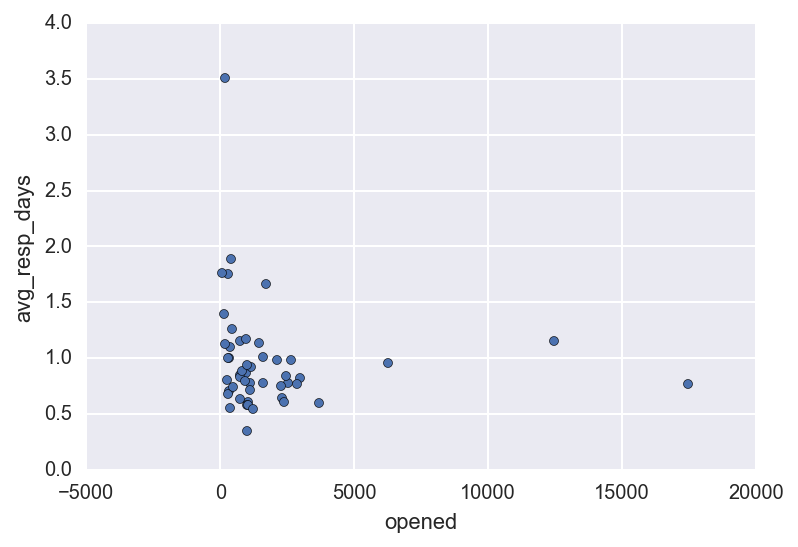

In [186]:
df_resp.plot(kind='scatter', x='opened', y='avg_resp_days')

In [167]:
df_yr.groupby(by=['Category', 'Neighborhood'])['Resolution_days'].mean().unstack()

Neighborhood,Alamo Square,Bayview,Bernal Heights,Castro,Cathedral Hill,Chinatown,Civic Center,Cow Hollow,Dogpatch,Dolores Heights,Downtown / Union Square,Duboce Triangle,Financial District,Fisherman's Wharf,Glen Park,Golden Gate Heights,Golden Gate Park,Haight Ashbury,Hayes Valley,Inner Richmond,Inner Sunset,Japantown,Lower Haight,Lower Nob Hill,Lower Pacific Heights,Marina,Mission,Mission Bay,Mission Dolores,Mission Terrace,Nob Hill,Noe Valley,North Beach,Oceanview,Outer Mission,Outer Richmond,Outer Sunset,Pacific Heights,Panhandle,Polk Gulch,Potrero Hill,Presidio Heights,Russian Hill,South of Market,Sutro Heights,Telegraph Hill,Tenderloin,Upper Market,Western Addition
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
311 External Request,38.831250,0.839236,21.646843,33.630972,5.767854,39.011651,9.941700,98.559028,44.084722,3.039236,28.415731,36.634549,19.690398,3.388889,19.353611,11.807292,1.952268,10.915953,27.077344,20.710278,28.250298,27.803646,4.927992,33.887797,26.174702,34.520139,26.144474,3.949769,25.750884,22.325661,19.975694,28.700694,6.368596,17.163542,10.956944,33.821488,11.673037,20.067072,14.934221,23.478770,13.832324,15.006944,18.476004,27.594161,6.834091,84.519444,23.626136,34.392859,16.944502
Abandoned Vehicle,3.497025,4.775669,4.931838,4.043169,4.545964,4.843022,3.595228,4.653317,4.645360,4.368789,4.291667,4.011497,4.907786,4.749884,5.991214,4.732101,4.181131,3.744599,4.457268,4.761682,4.479057,4.123720,4.388117,5.498797,4.590974,5.110444,4.700498,4.845655,4.775188,4.795111,5.318562,5.110337,4.515120,4.973402,5.725599,4.358852,4.688659,5.279243,4.472220,4.662036,4.592521,4.254411,5.243218,4.363589,4.467887,5.993403,4.597800,4.763510,4.319809
Blocked Street or SideWalk,2.351273,2.687600,6.990140,4.150935,5.091222,10.093102,7.910348,4.654960,8.243475,3.957743,7.596270,5.742785,7.328087,5.114167,7.722708,1.759145,2.236354,7.592861,8.674546,5.653141,6.510848,3.835532,2.796327,7.255261,4.793711,4.558603,3.880946,2.076027,5.955440,3.258887,11.300989,3.980080,7.615909,8.181424,1.391150,5.866310,4.112847,6.099537,6.019686,4.582338,9.928608,6.433611,13.759048,3.285729,2.031481,5.508657,3.389210,5.240046,7.787479
Catch Basin Maintenance,0.795324,28.121176,13.246130,NaN,13.088889,38.696721,1.831493,0.077083,2.939583,8.239931,34.847222,11.459398,17.808912,3.828472,43.905172,33.468715,NaN,22.407465,39.883333,1.787189,6.966613,2.274074,NaN,6.851914,1.105810,8.984525,22.532891,NaN,6.554184,0.560193,NaN,5.573476,6.483507,NaN,76.462847,9.569442,8.614997,25.366316,72.253715,33.882639,59.490615,15.524479,12.890938,33.139979,NaN,4.905903,25.323593,0.172025,0.887674
Color Curb,64.189931,65.021402,72.532191,63.501992,73.405394,NaN,49.507284,77.498965,64.171007,66.852164,63.343403,65.021468,62.001636,NaN,75.745498,74.313194,NaN,71.851405,53.899045,61.201413,72.273241,71.572024,76.750063,65.813294,65.574913,68.692327,69.477291,63.808750,65.838038,62.954620,57.860058,67.151374,79.931820,64.779995,80.868056,72.159855,64.570144,69.869174,78.043198,63.528521,61.053203,71.647042,64.517222,56.080752,NaN,63.681854,58.067977,67.532954,67.286654
Damaged Property,15.161828,5.134643,24.566177,19.393503,47.537355,71.599694,32.227784,53.589875,8.768185,15.933153,36.397946,17.027269,43.560341,64.067591,26.132601,2.185251,14.806589,73.832256,50.837640,55.304452,56.284271,57.760793,22.788328,56.986016,50.211324,70.413923,43.569842,47.644239,29.097920,32.676720,28.794511,49.910961,69.923719,1.150483,5.185473,49.979092,54.073844,41.341405,24.193954,50.637051,6.046685,87.554560,45.596235,47.816840,6.821942,31.207507,50.288961,1.685427,29.980808
General Requests,6.911362,11.656969,9.257461,5.631348,6.427884,10.841975,10.442947,6.221366,7.505875,9.523771,12.819113,7.249825,12.421860,10.557166,9.774446,12.152122,13.355909,6.150688,11.712075,9.996169,8.249613,15.670141,9.329846,9.849531,10.316775,12.184572,9.999524,13.160211,8.018964,10.921465,8.780197,8.132563,10.130436,8.222689,12.815019,9.214206,10.420441,8.348336,15.183047,7.170303,9.439299,8

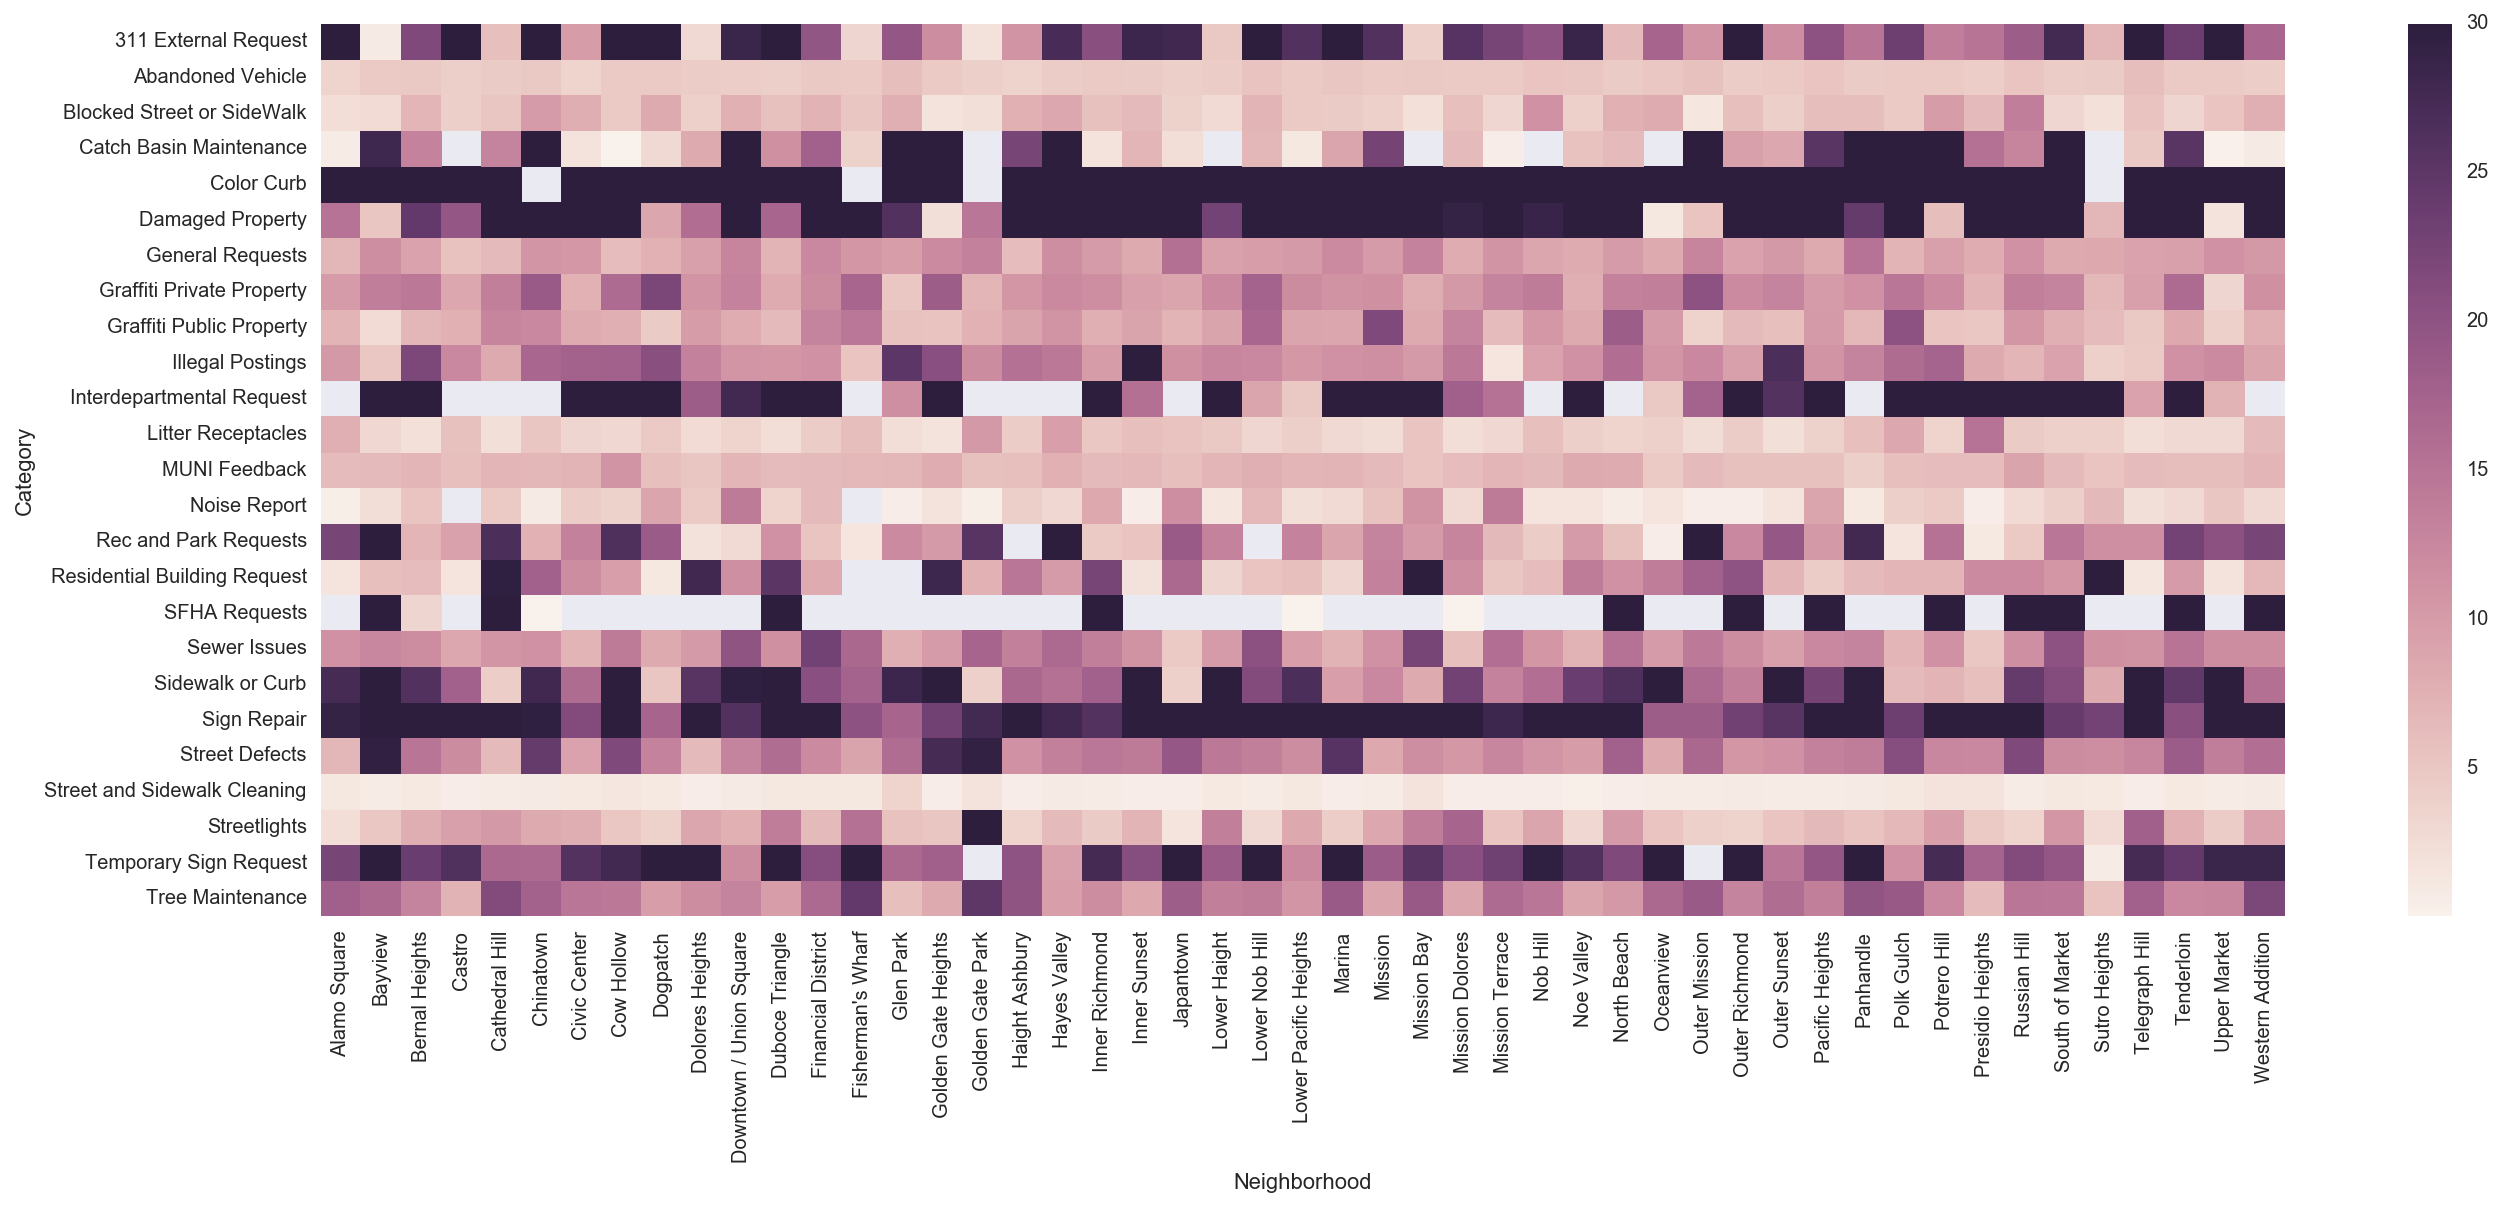

In [168]:
fig, ax = plt.subplots(figsize=(22, 8))

sns.heatmap(df_yr.groupby(by=['Category', 'Neighborhood'])['Resolution_days'].mean().unstack(), ax=ax, vmax=30)